# Analysis on Suicides in INDIA

## Importing required packages

In [141]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Dataset consisting of suicide cases from 2001 to 2012 in India

In [2]:
ind=pd.read_csv('India/Suicides in India 2001-2012.csv')
ind

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


In [3]:
dl=['Total (All India)', 'Total (States)', 'Total (Uts)']
for i in dl:
    ind=ind[ind['State']!=i]
ind.reset_index(inplace=True)
ind.drop(columns=['index'],inplace=True)

## Analysis by State

[Text(0, 0.5, 'State'), Text(0.5, 0, 'Suicides')]

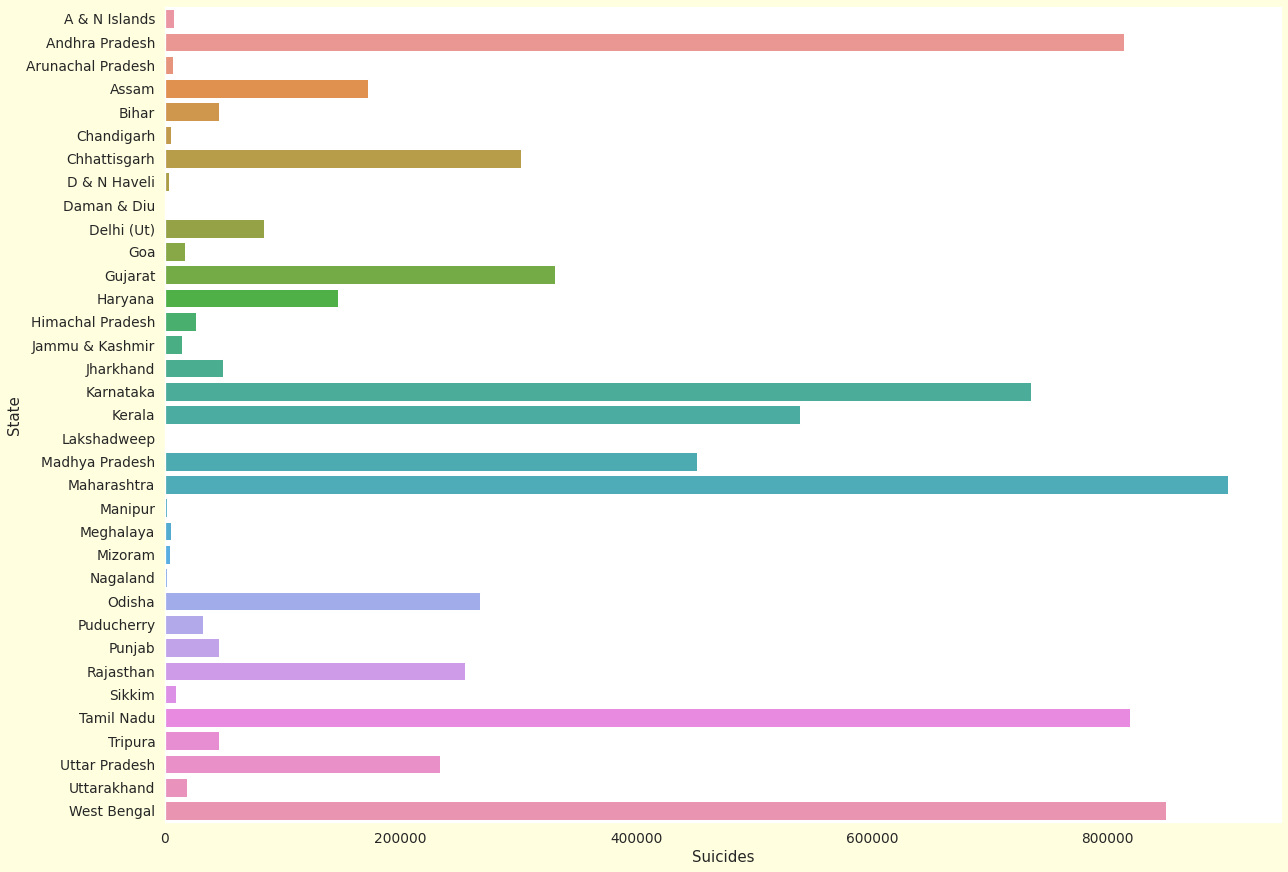

In [84]:
st=ind.groupby('State').agg('sum')
sns.set(rc={'figure.figsize':(20,15), 'axes.facecolor':'white', 'figure.facecolor':'lightyellow'}, font_scale=1.25)
state_analysis=sns.barplot(st['Total'], st.index)
state_analysis.set(ylabel='State', xlabel='Suicides')

- Maharastra is the top most state with a suicides count of nearly 900000+
- Followed by West Bengal, Andhra Pradesh and Tamil Nadu

## Year wise Analysis

[Text(0, 0.5, 'Accident'), Text(0.5, 0, 'Year')]

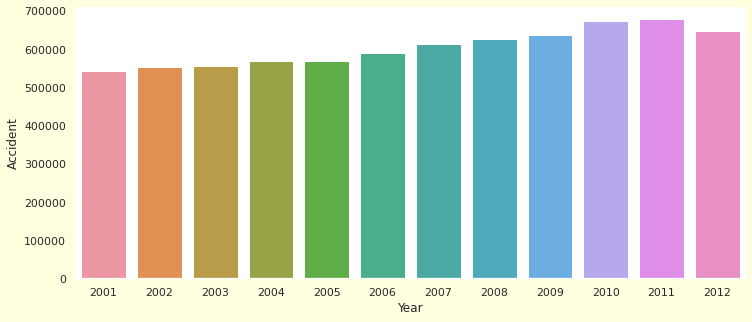

In [83]:
yr=ind.groupby('Year').agg('sum')
sns.set(rc={'figure.figsize':(12,5), 'axes.facecolor':'white', 'figure.facecolor':'lightyellow'})
year_analysis=sns.barplot(yr.index, yr['Total'])
year_analysis.set(ylabel='Accident', xlabel='Year')

- 2011 has highest suicide rate followed by 2010 and 2012

## Other Factors

In [113]:
ind['Type_code'].unique()

array(['Causes', 'Education_Status', 'Means_adopted',
       'Professional_Profile', 'Social_Status'], dtype=object)

## Cause

[Text(0, 0.5, 'Cause'), Text(0.5, 0, 'Accident')]

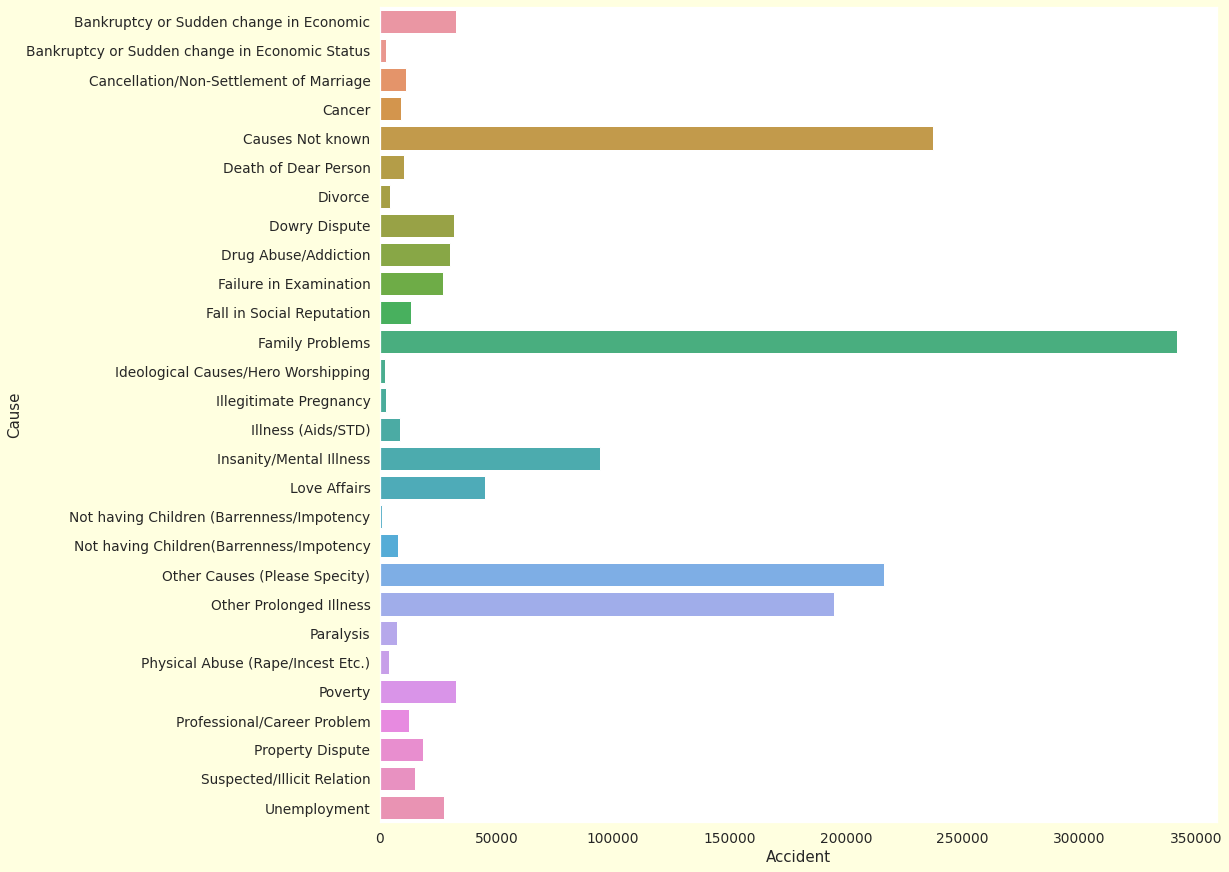

In [142]:
cause=ind[ind['Type_code']=='Causes']
tp=cause.groupby('Type').agg('sum')
sns.set(rc={'figure.figsize':(15,15), 'axes.facecolor':'white', 'figure.facecolor':'lightyellow'},font_scale=1.25)
type_analysis=sns.barplot(tp['Total'], tp.index)
type_analysis.set(ylabel='Cause', xlabel='Accident')

- Most of the people commited suicide due to Family Problems

## Educational Status

[Text(0, 0.5, 'Qualification'), Text(0.5, 0, 'Accident')]

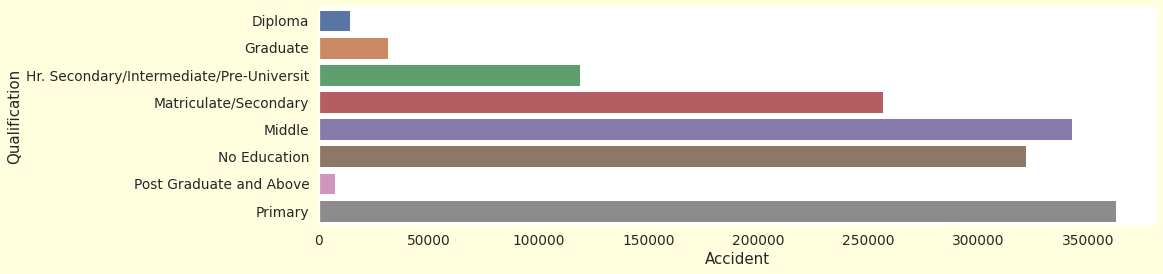

In [125]:
edu=ind[ind['Type_code']=='Education_Status']
tp=edu.groupby('Type').agg('sum')
sns.set(rc={'figure.figsize':(15,4), 'axes.facecolor':'white', 'figure.facecolor':'lightyellow'},font_scale=1.25)
type_analysis=sns.barplot(tp['Total'], tp.index)
type_analysis.set(ylabel='Qualification', xlabel='Accident')

- Primary Educated people are committing more suicides

## Methods used to Suicide

[Text(0, 0.5, 'Method'), Text(0.5, 0, 'Accident')]

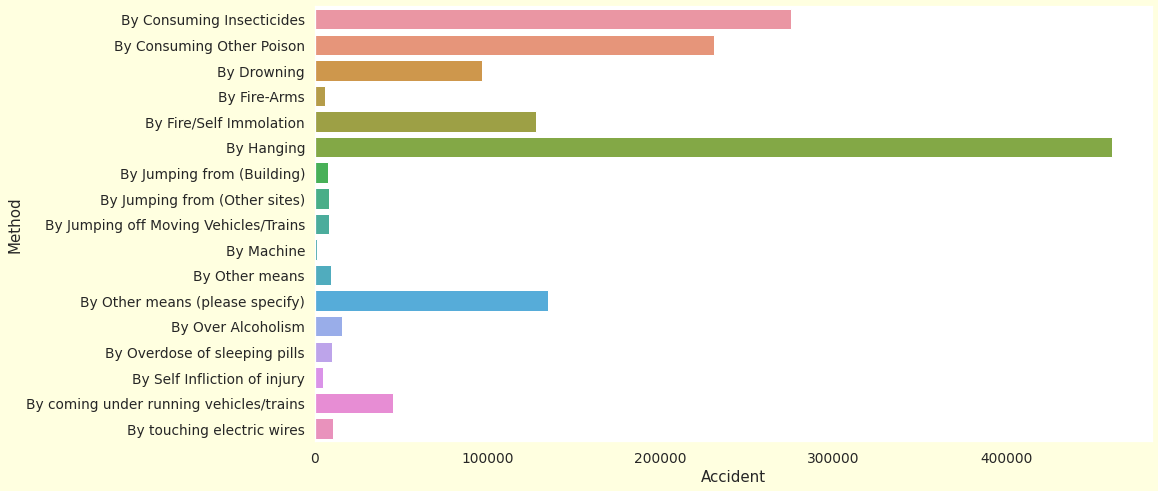

In [132]:
means=ind[ind['Type_code']=='Means_adopted']
tp=means.groupby('Type').agg('sum')
sns.set(rc={'figure.figsize':(15,8), 'axes.facecolor':'white', 'figure.facecolor':'lightyellow'},font_scale=1.25)
type_analysis=sns.barplot(tp['Total'], tp.index)
type_analysis.set(ylabel='Method', xlabel='Accident')

- Many people died by hanging themselves

## Professional Status

[Text(0, 0.5, 'Profession'), Text(0.5, 0, 'Accident')]

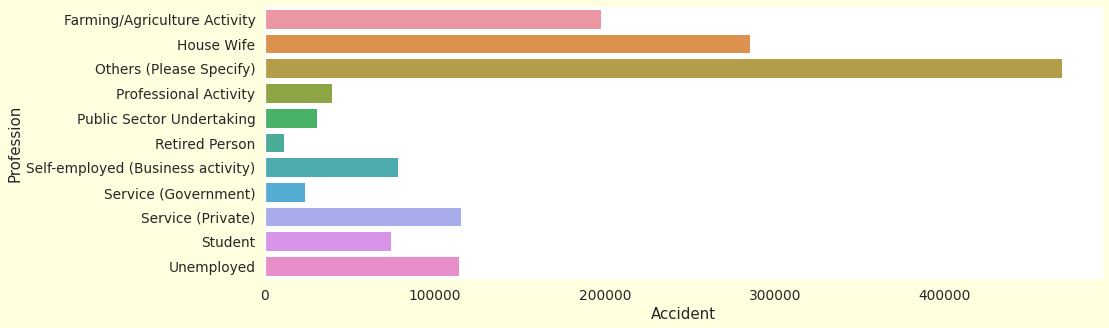

In [136]:
prof=ind[ind['Type_code']=='Professional_Profile']
tp=prof.groupby('Type').agg('sum')
sns.set(rc={'figure.figsize':(15,5), 'axes.facecolor':'white', 'figure.facecolor':'lightyellow'},font_scale=1.25)
type_analysis=sns.barplot(tp['Total'], tp.index)
type_analysis.set(ylabel='Profession', xlabel='Accident')

- Suicides are not mainli dependent upon a profession
- Other than that House wifes are top in committing suicides

## Social Status

[Text(0, 0.5, 'Status'), Text(0.5, 0, 'Accident')]

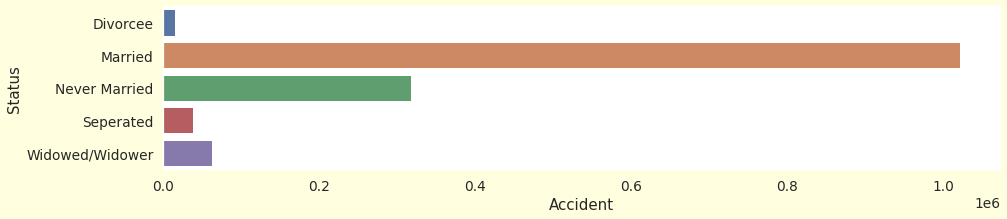

In [140]:
status=ind[ind['Type_code']=='Social_Status']
tp=status.groupby('Type').agg('sum')
sns.set(rc={'figure.figsize':(15,3), 'axes.facecolor':'white', 'figure.facecolor':'lightyellow'},font_scale=1.25)
type_analysis=sns.barplot(tp['Total'], tp.index)
type_analysis.set(ylabel='Status', xlabel='Accident')

- Married persons are comitting more suicides.

## Gender

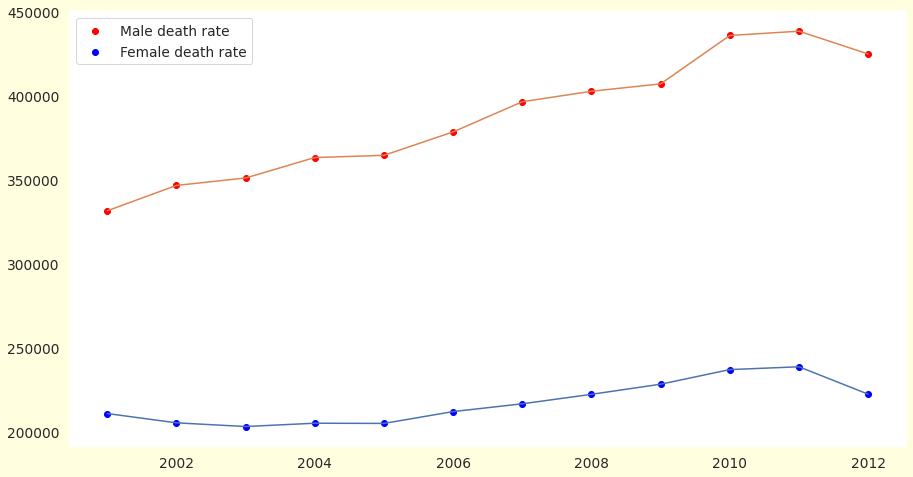

In [151]:
female=ind[ind['Gender']=='Female']
female=female.groupby('Year').agg('sum')
male=ind[ind['Gender']=='Male']
male=male.groupby('Year').agg('sum')

g=plt.figure(figsize=(15,8))
plt.scatter(male.index, male['Total'], color='red', label='Male death rate')
plt.scatter(female.index, female['Total'], color='blue', label='Female death rate')
plt.plot(female.index, female['Total'])
plt.plot(male.index, male['Total'])
plt.legend()
x=plt.gca()
x.set_facecolor('white')
x.yaxis.label.set_color('lightyellow')
x.xaxis.label.set_color('lightyellow')

- Male death rate is higher compared to Female